# ¡Hola, David!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [509]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [510]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv("/datasets/instacart_orders.csv",sep = ";")
products = pd.read_csv("/datasets/products.csv",sep = ";")
aisles = pd.read_csv("/datasets/aisles.csv", sep = ";")
departments = pd.read_csv("/datasets/departments.csv", sep = ";")
order_products = pd.read_csv("/datasets/order_products.csv", sep = ";")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

In [511]:
# mostrar información del DataFrame
print(instacart_orders.head())
instacart_orders.info()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [512]:
# mostrar información del DataFrame
print(products.head())
products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [513]:
# mostrar información del DataFrame
print(aisles.head())
aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [514]:
# mostrar información del DataFrame
print(departments.head())
departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [515]:
# mostrar información del DataFrame
print(order_products.head())
order_products.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Después de una revisión preliminar de cada archivo ".cvs" encontre lo siguiente de cada uno:

**instacart_orders.csv**

* La base esta con un formato que no se puede analizar, si bien el formato cvs alude que la separación es mediante comas, en este caso estaba separada con este simbolo ";" además no estaba realmente separada sino todas los datos estaban en las filas. Para arreglar esto, pase el parametro sep= cuando leí el archivo como el commando read_cvs.

* Las columnas order_dow y oder_hour_of_day estan son tipo de dato integer, al tratarse de fechas y horas respecticamente, tal vez sea conveniente pasarlas al tipo datetime, mas adelante veremos si se necesita.

* La columna days_since_prior_order tiene 28,819 valores NaN.

**products.csv**

* La base esta con un formato que no se puede analizar, si bien el formato cvs alude que la separación es mediante comas, en este caso estaba separada con este simbolo ";" además no estaba realmente separada sino todas los datos estaban en las filas. Para arreglar esto, pase el parametro sep= cuando leí el archivo como el commando read_cvs.

* La columna product_name tiene 1,258 valores NaN.

**aisles.csv**

* La base esta con un formato que no se puede analizar, si bien el formato cvs alude que la separación es mediante comas, en este caso estaba separada con este simbolo ";" además no estaba realmente separada sino todas los datos estaban en las filas. Para arreglar esto, pase el parametro sep= cuando leí el archivo como el commando read_cvs.

* No tenemos valores NaN.

**departments.csv**

* La base esta con un formato que no se puede analizar, si bien el formato cvs alude que la separación es mediante comas, en este caso estaba separada con este simbolo ";" además no estaba realmente separada sino todas los datos estaban en las filas. Para arreglar esto, pase el parametro sep= cuando leí el archivo como el commando read_cvs.

* No tenemos valores NaN.

**order_products.csv**

* La base esta con un formato que no se puede analizar, si bien el formato cvs alude que la separación es mediante comas, en este caso estaba separada con este simbolo ";" además no estaba realmente separada sino todas los datos estaban en las filas. Para arreglar esto, pase el parametro sep= cuando leí el archivo como el commando read_cvs.

* Posiblemente algunas columnas tengamos que cambiarlas a strings, si bien al parecer no afecta que esten en integer porque no haremos cálculos aritéticos con ellas, en el transcurso del proyecto se verá si es necesario o no.

* La columna add_to_cart_order tiene 836 valores ausentes.






 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de datos y la lectura de los problemas.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [516]:
# Revisa si hay pedidos duplicados

orders_duplicated = instacart_orders["order_id"].duplicated().sum()
print("Hay",orders_duplicated,"pedidos duplicados")
print()
orders_duplicated = instacart_orders[instacart_orders["order_id"].duplicated()].sort_values("order_id").head(15)
print(orders_duplicated)



Hay 15 pedidos duplicados

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
371905    391768    57671            19          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
273805   1112182   202304            84          3                  2   
411408   1286742   183220            48          3                  2   
266232   1782114   106752             1          3                  2   
230807   1918001   188546            14          3                  2   
323900   1919531   191501            32          3                  2   
441599   2125197    14050            48          3                  2   
223105   2160484   107525            16          3                  2   
345917   2232988    8256

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, tenemos 15 filas duplicadas. Todas se realizaron el miércoles a las 2 de la tarde.

In [517]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_orders = instacart_orders[(instacart_orders["order_dow"] == 3) & (instacart_orders["order_hour_of_day"] == 2)].head()
print(wed_orders)

       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


¿Qué sugiere este resultado?

El día miércoles a las 2:00 am cinco clientes hicieron un pedido ( con base en su user_id que es un idenificador unico de cada cliente). Uno de ellos ya ha comprado 41 veces , tres de ellos han comprado entre 19 y 18 veces, y solo uno ha comprado 2 veces.

In [518]:
# Elimina los pedidos duplicados
# Primero revise con base en la columna order_id en que columnas había duplicados.
order_insta_duplicated = instacart_orders[instacart_orders["order_id"].duplicated()].sort_values("order_id")
print(order_insta_duplicated.count())







order_id                  15
user_id                   15
order_number              15
order_dow                 15
order_hour_of_day         15
days_since_prior_order    13
dtype: int64


In [519]:
# Aplique esta función para eliminar los duplicados en la columna "order_id"
instacart_orders = instacart_orders.drop_duplicates(subset="order_id")
print(instacart_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [520]:
# Vuelve a verificar si hay filas duplicadas
duplicated_rows = instacart_orders.duplicated().sum()
print(duplicated_rows)

0


In [521]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
order_insta_duplicated = instacart_orders[instacart_orders["order_id"].duplicated()].sort_values("order_id")
print(order_insta_duplicated.count())


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos

Revisé los pedidos duplicados con base en la columna "order_id" del dataframe inscart_orders. Descubrimos que había en total 15, y que todos se hicieron el día miércoles a las 2 de la tarde, sería interesante ver que sucedió ese dia. Después, eliminamos esos valores para que solo tuvieramos valores únicos en la columna "order_id" y esto nos ayude en los siguientes análisis.



### `products` data frame

In [522]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())



0


In [523]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products["department_id"].duplicated().sum())


49673


In [524]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(products["product_name"].str.upper().duplicated().sum())

1361


In [525]:
# Revisa si hay nombres duplicados de productos no faltantes
not_na_products = products[~products["product_name"].isna()]
duplicated_products = not_na_products["product_name"].str.upper().duplicated().sum()
print(duplicated_products)




104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Hay 49673 ID´s duplicados de la columna "department_id" que identifica cada departamento de viveres. En esta columna no hay valores faltantes, entonces, el analisis no esta sesgado por estos valores, a diferencia del análisis de la columna de nombre de productos que se menciona a continuación.

* Hay 1361 nombre duplicados de productos, sin embargo, ese análisis se hizo considerando tanto las céldas con strings como con valores faltantes. Despúes , se hizo el mismo análisis pero quitando los valores faltantes, y el resultado fue de 104. Esto es importante, porque demuestra como los valores faltantes pueden afectar el análisis y enviarnos resultados que se pueden malinterpretar. 


 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Perfecto!
</div>

### `departments` data frame

In [526]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [527]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments["department_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas totalmente iguales y tampoco hay IDs duplicados en la "columna department_id"

### `aisles` data frame

In [528]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [529]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles["aisle_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas totalmente iguales y tampoco hay IDs duplicados en la columna "aisle_id"

### `order_products` data frame

In [530]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [531]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products[order_products["order_id"].duplicated()].sort_values("order_id").head(10))
print()
print(order_products[order_products["product_id"].duplicated()].sort_values("product_id").head(10))
print()
print(order_products[order_products["add_to_cart_order"].duplicated()].sort_values("add_to_cart_order").head(10))
print()
print(order_products[order_products["reordered"].duplicated()].sort_values("reordered").head(10))

         order_id  product_id  add_to_cart_order  reordered
2834230         4       26434                2.0          1
1420535         4       10054                5.0          1
2507695         4       17616               10.0          1
1295279         4       39758                3.0          1
1299531         4       32645               12.0          1
1172585         4       22598                7.0          1
3977678         4       21351                6.0          1
2502556         4       41276               13.0          1
4107072         4       40285                9.0          1
1169276         4       27761                4.0          1

         order_id  product_id  add_to_cart_order  reordered
4266839   1983366           1               13.0          0
528900    1773146           1                6.0          1
3985558   1977647           1                1.0          1
4390924    161236           1                4.0          0
1113333   1484430           1          

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas totalmente iguales y en el caso de las columnas analizadas de forma individual si los hay, sin embargo, es normal, ya que con base en lo que representa cada columna es normal que se repitan.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección.
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [532]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products["product_name"].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Encontramos que hay 1258 valores ausentes en la columna "product_name", es decir, falta el nombre del producto

In [533]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products["product_name"].isna()) & (products["aisle_id"] == 100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Encontramos que la columna "product_name" tiene 1258 valores ausentes, luego quisimos ver si todos esos valores correspondian al pasillo con ID 100 presente en la columna "aisle_id". Al hacer el análisis, vimos que efectivamente es verdad esta aseveración.

In [534]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products["product_name"].isna()) & (products["department_id"] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Efectivamente, todos los productos ausentes en la columna "product_name" tiene una relación con el departamente con ID 21 en la columna "department_id"

In [535]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments["department_id"] == 21])
print()
print("*****************************************")
print(aisles[aisles["aisle_id"] == 100])


    department_id department
20             21    missing

*****************************************
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

Cuando hice una revisión en el dataframe de aisles en la columna "aisle_id" buscando el pasillo con ID 100 me puso que el nombre de pasillo como missing. Luego, cuando busque en el dataframe de department en la columna "department_id" buscando el departamento con número 21 también me puso el nombre como missing.

En ambos casos, hice una prueba con diferentes números ID de pasillo y ID de departamente respectivamente y si me arrojaba tanto nombre de departamento como nombre de pasillo. Será interesante ver este resultado como lo puedo usar más adelante.

In [536]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")


Describe brevemente tus hallazgos y lo que hiciste con ellos.

La falta de nombre de producto en la columna "product_name" lo cambie por la palabra UnKnown para que refleje mejor el significado de los valores asusentes que se tenian antes.

### `orders` data frame 
Cuando diga orders se refiere a instacart_orders

In [537]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [538]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders[(instacart_orders["days_since_prior_order"].isna()) & 
                       (~instacart_orders["order_number"] == 1)])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Solo tenemos valores ausentes en la columna "days_since_prior_order". Al hacer una revisión, vemos que cuando esto paso el valor de la columna "order_number" es igual a 1, es decir, que tiene sentido que esa columna tenga valores ausentes ya que al ser el primer pedido del cliente no pueden haber transcurrido dias desde su último pedido.

### `order_products` data frame

In [539]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [540]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("El valor mínimo en la única columna que tiene valores ausentes es",order_products["add_to_cart_order"].min(),
      "y el valor máximo es", order_products["add_to_cart_order"].max())


El valor mínimo en la única columna que tiene valores ausentes es 1.0 y el valor máximo es 64.0


Describe brevemente cuáles son tus hallazgos.

En el dataframe order_products solamente la columna "add_to_cart_order" tiene valores ausentes, en total, 836. También, cuando revisamos en esa columna cual era el valor mínimo el resultado fue 1 y el máximo 64. Recordemos que esa columna describe el orden secuencial en el que se añadio cada artículo en el carrito, por ende, podriamos decir que el máximo de veces que se han agregado articulos en un pedido son 64 veces.

In [541]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

na_cart_order = order_products[order_products["add_to_cart_order"].isna()]["order_id"]
print(na_cart_order)


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [542]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

gr_order_id = order_products[order_products["order_id"].isin(na_cart_order)]
product_id = gr_order_id.groupby("order_id")["product_id"].count().min()
print(product_id)




65


Describe brevemente cuáles son tus hallazgos.

En el dataframe order_products la única columna que tiene valores faltantes es "add_to_cart_order" que muestra el orden secuencial en el que se añadio cada artículo en el carrito. También, en esa columna el valor mínimo es 1 y el máximo es 64, es decir, el mínimo de productos que se agrega es uno y el máximo que se ha agredado es 64.

Y si, todos los valores ausentes tienen más de 65.


In [543]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Primero remplazo los valores ausentes con el número 999
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999)

# Como el número 999 es un integer al remplazarlo por los valores ausentes el tipo de dato de la
# la columna add_to_cart_order cambia de float a object, ya que ahora contiene tanto datos float como
# integer. Enonces convierto nuevamente todos los datos a float
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].astype("float")

# Antes de convertir los datos a integer necesito revisar que al hacerlo no se perderá ninguna
# información.

np.array_equal(order_products["add_to_cart_order"],order_products["add_to_cart_order"].astype("int"))


True

In [544]:
# Convierto los valores de la columna add_to_cart_order a integer

order_products["add_to_cart_order"] = order_products["add_to_cart_order"].astype("int")
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Remplace los valores ausentes de la columna "add_to_cart_order" por el número 999, sin embargo, al hacerlo se transformo el tipo de dato de la columna de float a object porque al poner el 999 la columna ahora contenia tanto floats como integers. Recordar que object puede ser un string o una combinación de diferentes tipos de datos.

El objetivo era transformar la columna a integer, pero para eso, primero tenia que revisar si hacer eso no ocasionaría que se perdiera información, es decir, puntos decimales. Cuando vi que no pasaba eso, entonces procedí en hacer la conversión.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
Identifica y completa los valores ausentes.
Identifica y elimina los valores duplicados.
Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

****************************************************************************


En el paso 2 - Procesamiento de datos revisamos en cada dataframe la situación sobre los valores ausentes y duplicados

Empezamos con los revisar los valores duplicados, el orden en que se realizó fue el siguiente:

**Valores duplicados**

*dataframe instacart_orders*

Revisamos los valores duplicados con base en la columna "id_order" la cual contiene IDs únicos que identifican los pedidos, nos dimos cuenta que habia 15 valores duplicados y todos pertenecian al día miércoles y realizados a las 2 de la tarde. Decidimos eliminarlos ya que esta tabla debería tener valores únicos en esa columna.

*dataframe products*

Revisamos los valores duplicados en filas completas y no hubo, luego con base en la columna "department_id" y encontramos 49,673. En esta columna no hay valores faltantes, entonces los valores duplicados son información que realmente existe en la columna. Al ser la columna "departament_id" la que identifica los departamentos de víveres parece que es correcto que se repitan id's.

Luego, revisamos la columna "product_name" donde estan los nombres de los productos. Lo interesante aqui es que el primer análisis arrojo que habían 1,361 duplicados, pero estos consideran toda la información de la columna en donde tenemos valores ausentes. Después, repetimos el análisis sin considerar los valores ausentes, y ahora el resultado fue de 104. Es importante ver como los valores ausentes pueden sesgar nuestro análisis y dar conclusiones erroneas.

*dataframe departments*

Revisamos los valores duplicados en filas completas y no hubo, luego hicimos el mismo análisis pero considerando solo la columna "department_id" y el resultado fue el mismo. Esto tiene sentido, ya que esta tabla solo contiene dos columnas, la de deparment que tiene el nombre del departamento y la de department_id que tiene le ID que identifica de manera única a cada departamento de víveres.

*dataframe aisles*

Revisamos los valores duplicados en filas completas y no hubo, luego hicimos el mismo análisis pero considerando solo la columna "aisles_id" y el resultado fue el mismo. El resultado de esto es parecido al que obtuvimos cuando analizamos el dataframe departments, ya que también solo contiene dos columnas, y pues ambas contiene valores únicos, por un lado "aisles_id" identifica de manera única cada categoría de pasillo de viveres, y la columna "aisle" contiene le nombre del pasillo.

*dataframe order_products*

Revisamos los valores duplicados en filas completas y no hubo, y luego al analizar las demás columnas si hay , sin embargo, esto al parecer es normal considerando la naturaleza de las columnas.

Una vez que terminamos de analizar los valores duplicados, seguimos con revisar los valores ausentes

**Valores ausentes/faltantes**

*dataframe products*

Revisamos los valores ausentes de la columna "product_name" y obtuvimos que hacen falta 1258 nombres de productos, y que todos estos nombres ausentes tienen relación con el pasillo número 100, y al mismo tiempo, estan relacionados con el departamento id número 21. Posteriormente, decidimos cambiar los valores ausentes por la palabra Unknown.

*dataframe instacart_orders*

Revisamos los valores ausentes de todo el data frame y solamente la columna "days_since_prior_order" tiene, en total, 28817, sin embargo, todos estos coincidian con el número 1 de la columna "order_number" (contiene número de veces que el cliente ha hecho un pedido). Entonces, es entendible que esta es la razón de estos valores ausentes.

*dataframe order_products*

Revisamos los valores ausentes de todo el data frame y solamente la columna "add_to_cart_order" tiene, en total, 836. Esta columna muestra el orden secuencial en el que se añadió cada artículo en el carrito. El valor mínimo es 1 y el máximo 64. Decidimos cambiar los valores ausentes por el número 999, y cambiar la columna al tipo de dato integer. 

Es posible que los valores ausentes se deban a que los artículos se agregaron al carrito pero no se realizó realmente el pedido, por lo cual, no se agregaron secuencias de productos en la columna add_to_cart_order.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [545]:
sens_hour_of_day = instacart_orders[instacart_orders["order_hour_of_day"] > 23]
print(sens_hour_of_day)




Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [546]:
sens_order_dow = instacart_orders[instacart_orders["order_dow"] > 6]
print(sens_order_dow)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Escribe aquí tus conclusiones

Los valores de la columna "order_hour_of_day" si oscilan entre 0 y 23 , y los de "order_dow" si oscilan entre 0 a 6, por lo tanto, si son son razonables. Este análisis es importante para ver que realmente cada columna represente por un lado las horas del día, y por otro, los dias de la semana. Si hubieramos tenido por ejemplo un número 8 en la columna "order_dow" pues eso sería un foco rojo, ya que esto podria indicar un error en los datos, que se deberían corregir antes de analizar algo con esa columna.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

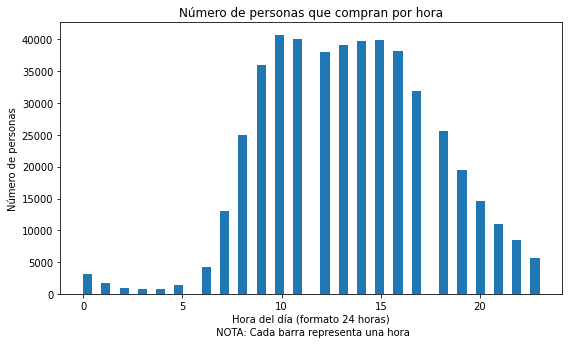

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [547]:
plt.figure(figsize=(9, 5))
instacart_orders["order_hour_of_day"].plot(kind = "hist", bins = 50)
                                           
plt.title("Número de personas que compran por hora")
plt.xlabel("Hora del día (formato 24 horas)\n NOTA: Cada barra representa una hora")
plt.ylabel("Número de personas")
plt.show()
print(instacart_orders["order_hour_of_day"].value_counts().sort_index())

Escribe aquí tus conclusiones

Se realizan la mayor cantidad de pedidos en un rango de 9 a.m. a las 16 p.m. Despúes de las 16 horas empiezan a disminuir.

### [A3] ¿Qué día de la semana compran víveres las personas?

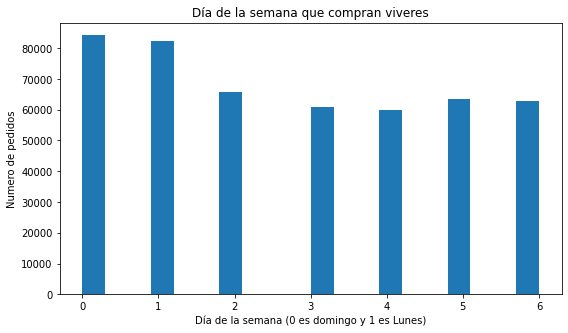

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


In [548]:
plt.figure(figsize=(9, 5))
instacart_orders["order_dow"].plot(kind = "hist", bins = 20)
                                           
plt.title("Día de la semana que compran viveres")
plt.xlabel("Día de la semana (0 es domingo y 1 es Lunes)")
plt.ylabel("Numero de pedidos")
plt.show()
print(instacart_orders["order_dow"].value_counts().sort_index())

Escribe aquí tus conclusiones

El domingo y el lunes es cuando se compran más viveres, podria ser entendible esto, porque las personas los quieren para usarlos durante toda la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [549]:
time_wait_order = instacart_orders[instacart_orders["days_since_prior_order"] != 1]
print(time_wait_order["days_since_prior_order"].sort_values(ascending = True).sample(10))
print()
print(time_wait_order["days_since_prior_order"].min())
print(time_wait_order["days_since_prior_order"].max())

63096     22.0
82647      8.0
109160     2.0
12873     30.0
224861    30.0
415393    12.0
312605     8.0
132308     7.0
295828    30.0
65681      2.0
Name: days_since_prior_order, dtype: float64

0.0
30.0


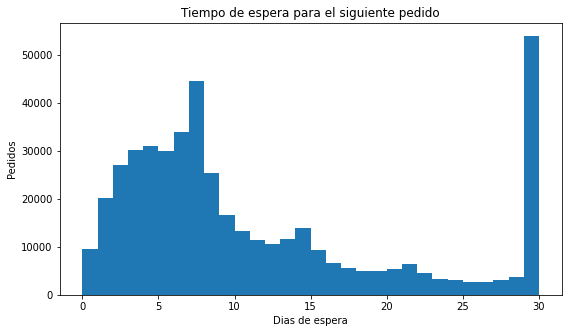

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64


In [550]:
plt.figure(figsize=(9, 5))
instacart_orders["days_since_prior_order"].plot(kind = "hist", bins = 30)
                                           
plt.title("Tiempo de espera para el siguiente pedido")
plt.xlabel("Dias de espera")
plt.ylabel("Pedidos")
plt.show()
print(instacart_orders["days_since_prior_order"].value_counts().sort_index())

Escribe aquí tus conclusiones

El tiempo mínimo que las personas tardan de hacer su segundo pedido es cero días, es decir, piden el mismo día, y el máximo son 30 días.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta sección `A`.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

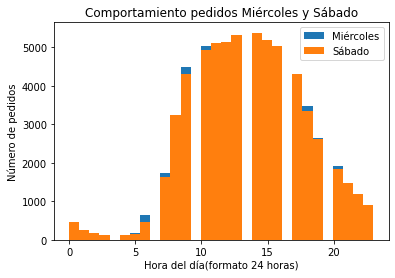

In [551]:
instacart_orders[instacart_orders["order_dow"]== 3]["order_hour_of_day"].plot(kind = "hist", bins=30)
instacart_orders[instacart_orders["order_dow"]== 6]["order_hour_of_day"].plot(kind = "hist", bins=30)
plt.title("Comportamiento pedidos Miércoles y Sábado")
plt.xlabel("Hora del día(formato 24 horas)")
plt.ylabel("Número de pedidos")
plt.legend(["Miércoles","Sábado"])


Escribe aquí tus conclusiones

Los pedidos realizados en miércoles y sábado practicamente tienen la misma distribución y el mismo volumen de pedidos recibidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

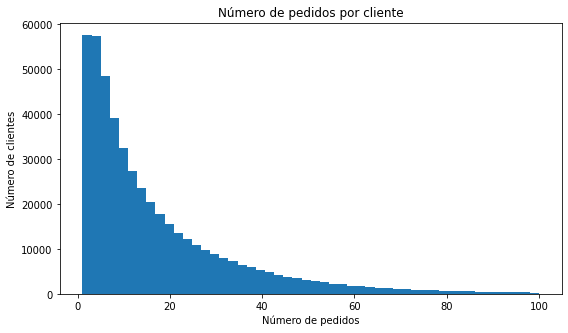

1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: order_number, Length: 100, dtype: int64


In [552]:
plt.figure(figsize=(9, 5))
instacart_orders["order_number"].plot(kind = "hist", bins = 50)
                                           
plt.title("Número de pedidos por cliente")
plt.xlabel("Número de pedidos")
plt.ylabel("Número de clientes")
plt.show()
print(instacart_orders["order_number"].value_counts().sort_index())


Escribe aquí tus conclusiones

Alrededor de 58 mil clientes realizan entre 1 y 5 pedidos, y luego la tendencia es que cada vez menos clientes realizan más de 5 pedidos y asi sucesivamente.


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [553]:
merge_products_frames =products.merge(order_products,on = "product_id")
print(merge_products_frames.head(10))

   product_id                product_name  aisle_id  department_id  order_id  \
0           1  Chocolate Sandwich Cookies        61             19   1104373   
1           1  Chocolate Sandwich Cookies        61             19   1774977   
2           1  Chocolate Sandwich Cookies        61             19    652770   
3           1  Chocolate Sandwich Cookies        61             19   1000035   
4           1  Chocolate Sandwich Cookies        61             19   1679949   
5           1  Chocolate Sandwich Cookies        61             19   3004237   
6           1  Chocolate Sandwich Cookies        61             19   2811336   
7           1  Chocolate Sandwich Cookies        61             19   2149117   
8           1  Chocolate Sandwich Cookies        61             19   1715986   
9           1  Chocolate Sandwich Cookies        61             19   1604797   

   add_to_cart_order  reordered  
0                 11          1  
1                  4          1  
2                

In [554]:
top_20_products = merge_products_frames[["product_id","product_name"]].value_counts().reset_index().head(40)
top_20_products.columns = ["product_id","product_name","quantity_of_products"]
print(top_20_products.head(20))

    product_id              product_name  quantity_of_products
0        24852                    Banana                 66050
1        13176    Bag of Organic Bananas                 53297
2        21137      Organic Strawberries                 37039
3        21903      Organic Baby Spinach                 33971
4        47209      Organic Hass Avocado                 29773
5        47766           Organic Avocado                 24689
6        47626               Large Lemon                 21495
7        16797              Strawberries                 20018
8        26209                     Limes                 19690
9        27845        Organic Whole Milk                 19600
10       27966       Organic Raspberries                 19197
11       22935      Organic Yellow Onion                 15898
12       24964            Organic Garlic                 15292
13       45007          Organic Zucchini                 14584
14       39275       Organic Blueberries               

Escribe aquí tus conclusiones

Pudimos descubrir que la cantidad de pedidos que se realizan el día miércoles y el sábado practicamente son iguales tanto en cantidad como en las horas en que se realizan.

También la mayoría de los clientes realizan de 1 a 5 pedidos, y el resto se distribuye entre 5 pedidos y 100 pedidos.

Y finalmente, vimos cuales son los 20 productos más pedidos.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo correcto en esta sección `B`.
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

        order_id  product_id
0              4          13
1              9          15
2             11           5
3             19           3
4             20           8
...          ...         ...
450041   3421034          17
450042   3421053           9
450043   3421071           5
450044   3421077           4
450045   3421079           1

[450046 rows x 2 columns]
10.098983215049127


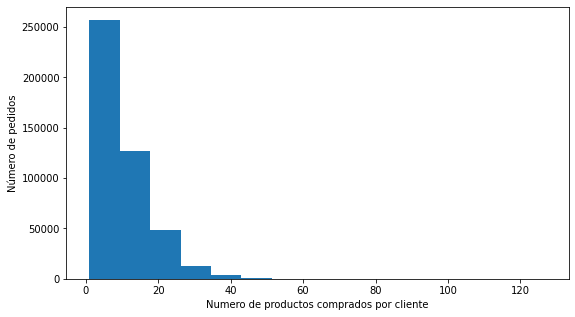

In [555]:
# Ver cuantos pedidos se han hecho y cuantos productos compraron en cada uno
products_buy = order_products.groupby("order_id")["product_id"].count().reset_index()
print(products_buy)

# Obtener el promedio de articulos comprados
count_orders = products_buy["order_id"].count()
sum_products = products_buy["product_id"].sum()
avg_products = sum_products / count_orders
print(avg_products)

# Graficar la distribución de los productos comprados por pedido
plt.figure(figsize=(9, 5))
products_buy["product_id"].plot(kind = "hist", bins = 15)
                                           
plt.title("")
plt.xlabel("Numero de productos comprados por cliente")
plt.ylabel("Número de pedidos")
plt.show()



In [556]:
print(order_products[order_products["add_to_cart_order"].duplicated()].sort_values("order_id").head(15))



         order_id  product_id  add_to_cart_order  reordered
3977678         4       21351                  6          1
1299531         4       32645                 12          1
2507695         4       17616                 10          1
2502556         4       41276                 13          1
3189411         4       25146                 11          1
2834230         4       26434                  2          1
4107072         4       40285                  9          1
311805          4       46842                  1          0
1295279         4       39758                  3          1
1420535         4       10054                  5          1
1172585         4       22598                  7          1
2043091         4       34862                  8          1
1169276         4       27761                  4          1
2302482         9         432                 13          1
907975          9        3990                 14          1


Escribe aquí tus conclusiones

El promedio de artículos comprados es 10.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [557]:
print(merge_products_frames.head(10))

   product_id                product_name  aisle_id  department_id  order_id  \
0           1  Chocolate Sandwich Cookies        61             19   1104373   
1           1  Chocolate Sandwich Cookies        61             19   1774977   
2           1  Chocolate Sandwich Cookies        61             19    652770   
3           1  Chocolate Sandwich Cookies        61             19   1000035   
4           1  Chocolate Sandwich Cookies        61             19   1679949   
5           1  Chocolate Sandwich Cookies        61             19   3004237   
6           1  Chocolate Sandwich Cookies        61             19   2811336   
7           1  Chocolate Sandwich Cookies        61             19   2149117   
8           1  Chocolate Sandwich Cookies        61             19   1715986   
9           1  Chocolate Sandwich Cookies        61             19   1604797   

   add_to_cart_order  reordered  
0                 11          1  
1                  4          1  
2                

In [558]:
top_20_products_reord = merge_products_frames[["reordered","product_id","product_name"]].value_counts().reset_index().head(40)
top_20_products_reord.columns = ["reordered","product_id","product_name","quantity_of_products"]
print(top_20_products_reord[top_20_products_reord["reordered"] == 1].head(20))

    reordered  product_id              product_name  quantity_of_products
0           1       24852                    Banana                 55763
1           1       13176    Bag of Organic Bananas                 44450
2           1       21137      Organic Strawberries                 28639
3           1       21903      Organic Baby Spinach                 26233
4           1       47209      Organic Hass Avocado                 23629
5           1       47766           Organic Avocado                 18743
6           1       27845        Organic Whole Milk                 16251
7           1       47626               Large Lemon                 15044
8           1       27966       Organic Raspberries                 14748
9           1       16797              Strawberries                 13945
10          1       26209                     Limes                 13327
11          1       22935      Organic Yellow Onion                 11145
12          1       24964            O

Escribe aquí tus conclusiones

Los platanos son los reyes de los pedidos, son los que más se vuelven a pedir.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?


In [559]:
print(merge_products_frames.head(10))

   product_id                product_name  aisle_id  department_id  order_id  \
0           1  Chocolate Sandwich Cookies        61             19   1104373   
1           1  Chocolate Sandwich Cookies        61             19   1774977   
2           1  Chocolate Sandwich Cookies        61             19    652770   
3           1  Chocolate Sandwich Cookies        61             19   1000035   
4           1  Chocolate Sandwich Cookies        61             19   1679949   
5           1  Chocolate Sandwich Cookies        61             19   3004237   
6           1  Chocolate Sandwich Cookies        61             19   2811336   
7           1  Chocolate Sandwich Cookies        61             19   2149117   
8           1  Chocolate Sandwich Cookies        61             19   1715986   
9           1  Chocolate Sandwich Cookies        61             19   1604797   

   add_to_cart_order  reordered  
0                 11          1  
1                  4          1  
2                

In [560]:
total_orders_products = merge_products_frames["product_id"].value_counts()
total_reorders_products = merge_products_frames[merge_products_frames["reordered"] == 1]["product_id"].value_counts()
reorder_rate_products = total_reorders_products / total_orders_products
print(reorder_rate_products)

1        0.564286
2             NaN
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: product_id, Length: 45573, dtype: float64


Escribe aquí tus conclusiones

Se comprueba como el platano es el producto de los más pedidos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

In [561]:
print(merge_products_frames.head(10))

   product_id                product_name  aisle_id  department_id  order_id  \
0           1  Chocolate Sandwich Cookies        61             19   1104373   
1           1  Chocolate Sandwich Cookies        61             19   1774977   
2           1  Chocolate Sandwich Cookies        61             19    652770   
3           1  Chocolate Sandwich Cookies        61             19   1000035   
4           1  Chocolate Sandwich Cookies        61             19   1679949   
5           1  Chocolate Sandwich Cookies        61             19   3004237   
6           1  Chocolate Sandwich Cookies        61             19   2811336   
7           1  Chocolate Sandwich Cookies        61             19   2149117   
8           1  Chocolate Sandwich Cookies        61             19   1715986   
9           1  Chocolate Sandwich Cookies        61             19   1604797   

   add_to_cart_order  reordered  
0                 11          1  
1                  4          1  
2                

In [562]:
total_orders_clients = merge_products_frames["order_id"].value_counts()
total_reorders_clients = merge_products_frames[merge_products_frames["reordered"] == 1]["order_id"].value_counts()
reorder_rate_clients = total_reorders_clients / total_orders_clients
print(reorder_rate_clients.head(15))

4     0.923077
9     0.666667
11    1.000000
19    1.000000
20         NaN
31    0.900000
48    0.250000
56    0.700000
61    0.916667
68    0.666667
75         NaN
80    0.857143
81    0.818182
83    0.357143
99    0.285714
Name: order_id, dtype: float64


Escribe aquí tus conclusiones

Por ejemplo, el cliente 4 ya habia vuelto a pedir el 92% de sus productos, a diferencia del cliente número 11 el cual ha vuelto a pedir el 100% de sus productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?


In [563]:
# Filtramos los productos que se agregaron primero en el carrito
first_added_products = merge_products_frames[merge_products_frames["add_to_cart_order"] == 1]

# Contamos el número de veces que cada producto fue agregago al carrito
first_added_counts = first_added_products["product_id"].value_counts()

top_20_first_added = first_added_products[first_added_products["product_id"].isin(first_added_counts.index)]
top_20_first_added = top_20_first_added[["product_id","product_name"]].drop_duplicates()
top_20_first_added = top_20_first_added.set_index("product_id")
top_20_first_added["first_added_count"] = first_added_counts

print(top_20_first_added.sort_values("first_added_count",ascending=False).head(20))


                           product_name  first_added_count
product_id                                                
24852                            Banana              15562
13176            Bag of Organic Bananas              11026
27845                Organic Whole Milk               4363
21137              Organic Strawberries               3946
47209              Organic Hass Avocado               3390
21903              Organic Baby Spinach               3336
47766                   Organic Avocado               3044
19660                      Spring Water               2336
16797                      Strawberries               2308
27966               Organic Raspberries               2024
44632        Sparkling Water Grapefruit               1914
49235               Organic Half & Half               1797
47626                       Large Lemon               1737
196                                Soda               1733
38689          Organic Reduced Fat Milk               13

Escribe aquí tus conclusiones

Comprobamos nuevamente que el producto que mas se pide son los platanos. También vemos como el aguacate y la leche entera orgánica se piden mucho.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección `C`.
</div>

### Conclusion general del proyecto:

El análisis que hicimos al comportamiento de los pedidos nos trajo información muy valiosa. Entre otras cosas, pudimos ver cuales son los productos que piden más así como la frecuencia de compra de los clientes.

La importancia de saber que productos son los más solicitados nos pueden ayudar a destinar campañas de publiciad más focalizadas, además si las empresas invierten en publicidad en nuestro sitio, poder mostrarles que tanto se esta vendido su producto y con ello, mostrar de alguna manera la efectividad de la tienda en posicionar la marca.

También se puede tener un cierto conocimientos sobre que tipo de personas son las que compran en la tienda, y empezar a traer igual más productos que esten acorde a sus gustos y necesidades, y quitar los que realmente no se venden y nos pueden estar generando costos al tenerlos en nuestro inventario.

Otro análisis que se pudo hacer es ver por ejemplo el platano en promedio que día o dias de la semana es cuando se pide más, para con esto, saber cuando y cuanto tendremos que pedir de este producto para siempre tenerlo en stock.

Finalmente, con nuestro análisis pudimos obtener información bastante valiosa que podrá servir a tomar decisiones más estrategicas y con mayor beneficio a los clientes y a la empresa.



 <div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, David. Nos quedan algunos elementos por corregir. He dejado comentarios a lo largo del documento para ello.
    
</div>

 <div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
    
</div>